In [1]:
import numpy as np
import pandas as pd
import nn
import matplotlib.pyplot as plt
import gp
import importlib

In [23]:
model_cfg = {
    "batch_size_p" : 0.1,
    "n_epochs" : 500,
    "verbose" : False,
    "n_input" : 4,
    "n_hidden" : 10,
    "n_output" : 3,
    "hidden_activation" : "relu",
    "stochastic" : True,
    "dropout_p" : 0.1,
    "epsilon" : 0.00,
    "n_samples" : 500
}

# load data 
df = pd.read_csv('r490.csv')
df = df[df['r1_charge_heater'] >= 0]

X = np.array(df[['r1_temp', 'r2_temp', 'r1_pressure', 'r2_pressure']])
Y = np.array(df[['r1_charge_heater', 'process_ron', 'process_yield']])

model = nn.FeedforwardNN(model_cfg)


In [24]:
ix = (X[:,1] == 136) & (X[:,2] == 50) & (X[:,3] == 50)
Xtrain = X[ix,:]
Ytrain = Y[ix,:]

In [25]:
model.train(Xtrain, Ytrain)

In [26]:
Xstar = np.array([ [r1t, 136, 50, 50] for r1t in np.linspace(120, 170, 1000)])
preds = model.predict(Xstar, model_cfg['n_samples'])

In [27]:
import scipy.stats as stats

a, b = stats.norm.interval(0.95, np.mean(preds, axis=0), np.std(preds, axis=0))

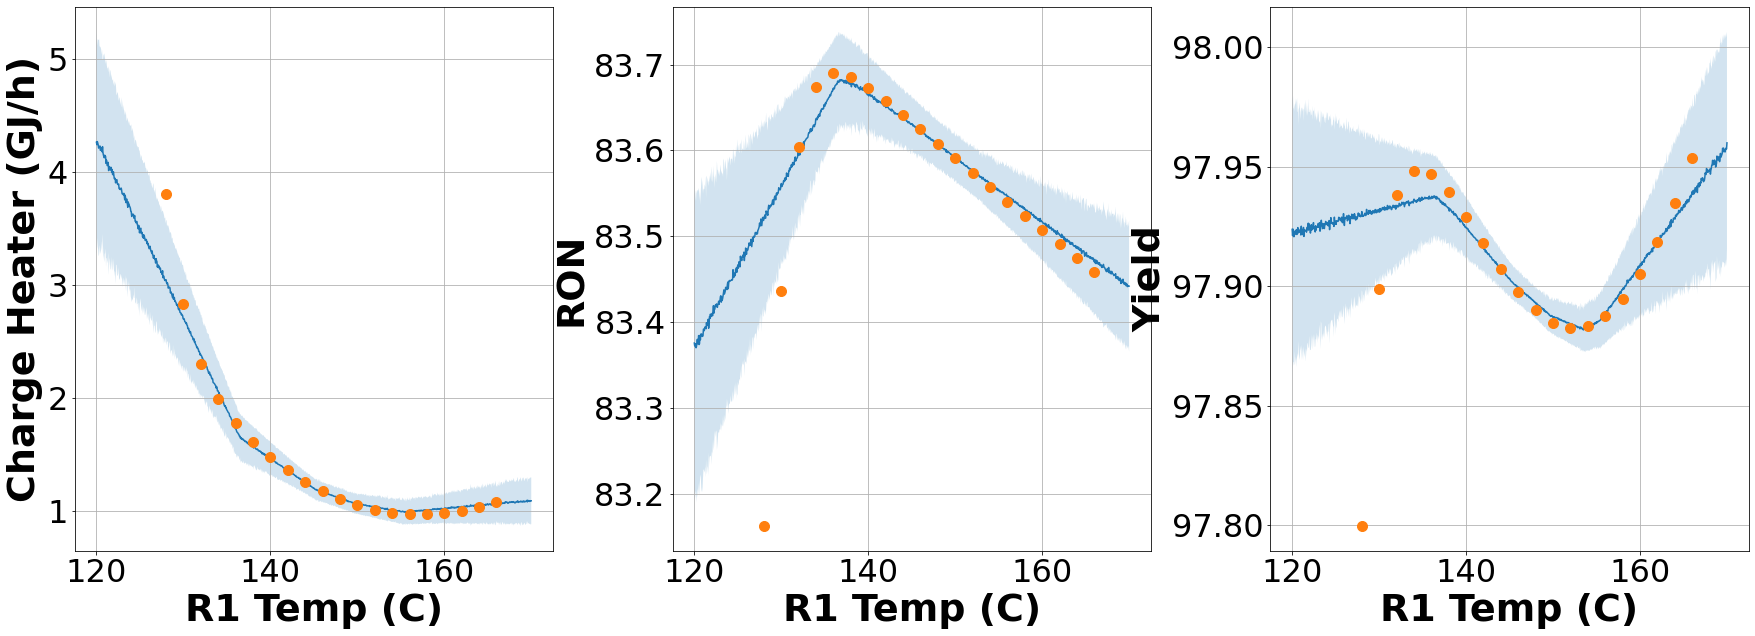

In [28]:
r1temps = np.linspace(120, 170, 1000)

f, axes = plt.subplots(1, 3, figsize=(30, 10))

mu = np.mean(preds, axis=0)

ax = axes[0]
ax.plot(r1temps, mu[:, 0] / 1e6, '-')
ax.fill_between(r1temps, a[:,0]/1e6, b[:,0]/1e6, alpha=0.2)
ax.plot(Xtrain[:, 0], Ytrain[:,0] / 1e6, 'o', markersize=10)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.set_xlabel('R1 Temp (C)', fontsize=38, fontweight='bold')
ax.set_ylabel('Charge Heater (GJ/h)', fontsize=38, fontweight='bold')
ax.grid(True)

ax = axes[1]
ax.plot(r1temps, mu[:, 1], '-')
ax.fill_between(r1temps, a[:,1], b[:,1], alpha=0.2)
ax.plot(Xtrain[:, 0], Ytrain[:,1], 'o', markersize=10)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.set_xlabel('R1 Temp (C)', fontsize=38, fontweight='bold')
ax.set_ylabel('RON', fontsize=38, fontweight='bold')
ax.grid(True)


ax = axes[2]
ax.plot(r1temps, mu[:, 2], '-')
ax.fill_between(r1temps, a[:,2], b[:,2], alpha=0.2)
ax.plot(Xtrain[:, 0], Ytrain[:,2], 'o', markersize=10)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.set_xlabel('R1 Temp (C)', fontsize=38, fontweight='bold')
ax.set_ylabel('Yield', fontsize=38, fontweight='bold')
ax.grid(True)

plt.subplots_adjust(wspace=0.25)

plt.savefig('tmp/fig9.tiff', bbox_inches='tight', transparent=True, pad_inches=0.05, dpi=300, pil_kwargs={"compression": "tiff_lzw"})


 /home/mmkhajah/venvs/sci/lib/python3.8/site-packages/GPy/kern/src/stationary.py:581: RuntimeWarning:overflow encountered in square
 /home/mmkhajah/venvs/sci/lib/python3.8/site-packages/GPy/kern/src/stationary.py:581: RuntimeWarning:invalid value encountered in multiply
 /home/mmkhajah/venvs/sci/lib/python3.8/site-packages/GPy/kern/src/stationary.py:584: RuntimeWarning:overflow encountered in square
 /home/mmkhajah/venvs/sci/lib/python3.8/site-packages/GPy/kern/src/stationary.py:584: RuntimeWarning:invalid value encountered in multiply
 /home/mmkhajah/venvs/sci/lib/python3.8/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/mmkhajah/venvs/sci/lib/python3.8/site-packages/GPy/kern/src/stationary.py:584: RuntimeWarning:invalid value encountered in subtract


In [9]:
Xstar = np.array([ [r1t, 136, 50, 50] for r1t in np.linspace(120, 170, 1000)])

# ones = np.ones(Xstar.shape[0])[:,np.newaxis]
# newX = np.vstack([np.hstack([Xstar,ones*i]) for i in range(3)])

# noise_dict = {'output_index': newX[:,[-1]].astype(int)}
# mu, var = m.predict(newX, Y_metadata=noise_dict)

# mu = np.reshape(mu, (3, Xstar.shape[0])).T
# var = np.reshape(var, (3, Xstar.shape[0])).T

In [10]:

a, b = stats.norm.interval(0.95, mu, np.sqrt(var))
mu.shape

 /tmp/ipykernel_1632569/2917073360.py:1: RuntimeWarning:invalid value encountered in sqrt


(1000, 3)

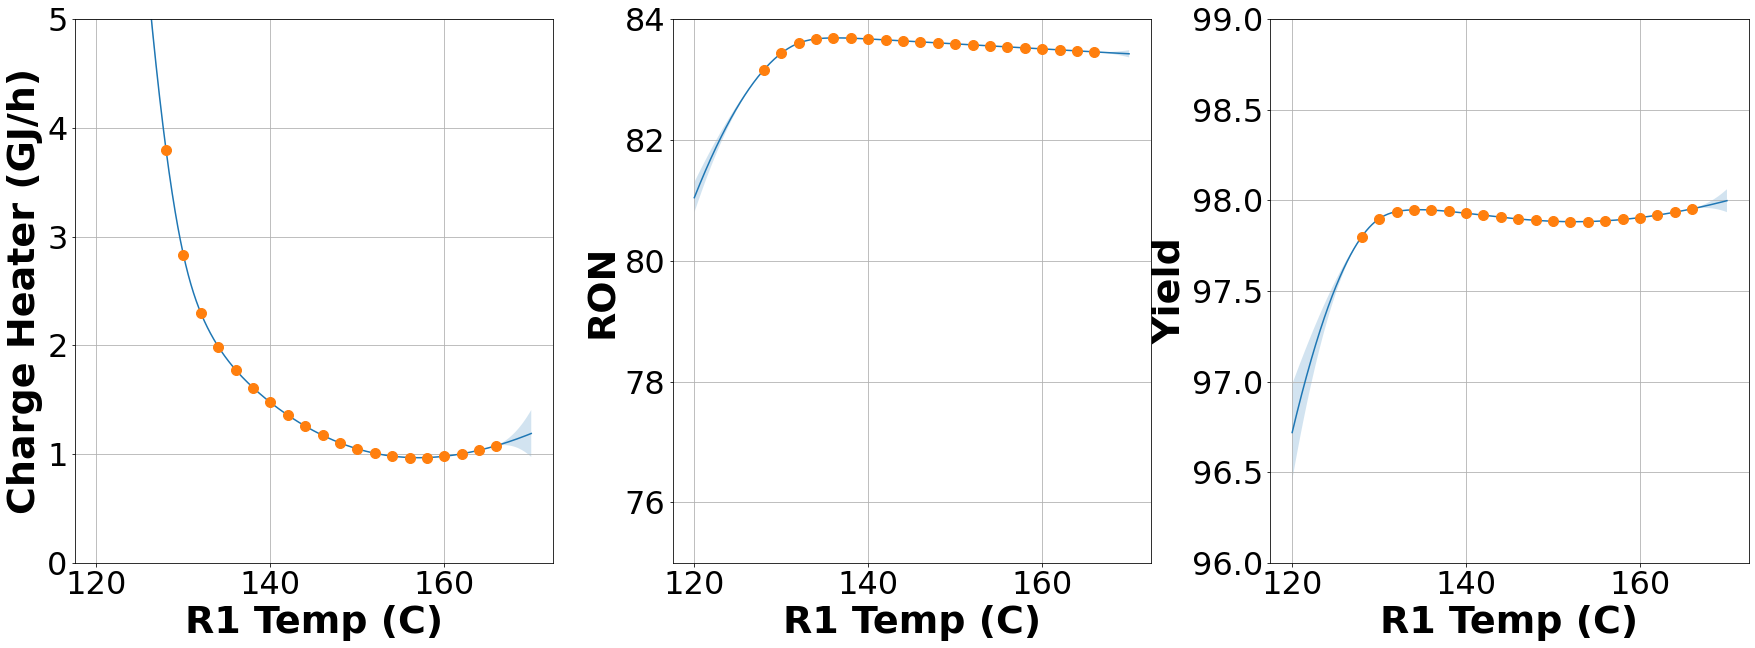

In [11]:
r1temps = np.linspace(120, 170, 1000)

f, axes = plt.subplots(1, 3, figsize=(30, 10))

ax = axes[0]
ax.plot(r1temps, mu[:, 0] / 1e6, '-')
ax.fill_between(r1temps, a[:,0]/1e6, b[:,0]/1e6, alpha=0.2)
ax.plot(Xtrain[:, 0], Ytrain[:,0] / 1e6, 'o', markersize=10)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.set_xlabel('R1 Temp (C)', fontsize=38, fontweight='bold')
ax.set_ylabel('Charge Heater (GJ/h)', fontsize=38, fontweight='bold')
ax.grid(True)
ax.set_ylim([0, 5])

ax = axes[1]
ax.plot(r1temps, mu[:, 1], '-')
ax.fill_between(r1temps, a[:,1], b[:,1], alpha=0.2)
ax.plot(Xtrain[:, 0], Ytrain[:,1], 'o', markersize=10)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.set_xlabel('R1 Temp (C)', fontsize=38, fontweight='bold')
ax.set_ylabel('RON', fontsize=38, fontweight='bold')
ax.grid(True)
ax.set_ylim([75, 84])


ax = axes[2]
ax.plot(r1temps, mu[:, 2], '-')
ax.fill_between(r1temps, a[:,2], b[:,2], alpha=0.2)
ax.plot(Xtrain[:, 0], Ytrain[:,2], 'o', markersize=10)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.set_xlabel('R1 Temp (C)', fontsize=38, fontweight='bold')
ax.set_ylabel('Yield', fontsize=38, fontweight='bold')
ax.grid(True)
ax.set_ylim([96, 99])

plt.subplots_adjust(wspace=0.25)

#plt.savefig('tmp/fig9.tiff', bbox_inches='tight', transparent=True, pad_inches=0.05, dpi=300, pil_kwargs={"compression": "tiff_lzw"})


In [54]:
Xstar.shape

(1000, 4)

In [64]:
import gp #import the module here, so that it can be reloaded.
importlib.reload(gp)

model = gp.GPModel({})
model.train(Xtrain, Ytrain)
samples = model.predict(Xstar)

[[120.         136.          50.          50.           0.        ]
 [120.05005005 136.          50.          50.           0.        ]
 [120.1001001  136.          50.          50.           0.        ]
 ...
 [169.8998999  136.          50.          50.           2.        ]
 [169.94994995 136.          50.          50.           2.        ]
 [170.         136.          50.          50.           2.        ]]


In [68]:
samples = model.predict(Xstar,100)

[[120.         136.          50.          50.           0.        ]
 [120.05005005 136.          50.          50.           0.        ]
 [120.1001001  136.          50.          50.           0.        ]
 ...
 [169.8998999  136.          50.          50.           2.        ]
 [169.94994995 136.          50.          50.           2.        ]
 [170.         136.          50.          50.           2.        ]]


 /home/mmkhajah/venvs/sci/lib/python3.8/site-packages/GPy/core/gp.py:614: RuntimeWarning:covariance is not positive-semidefinite.


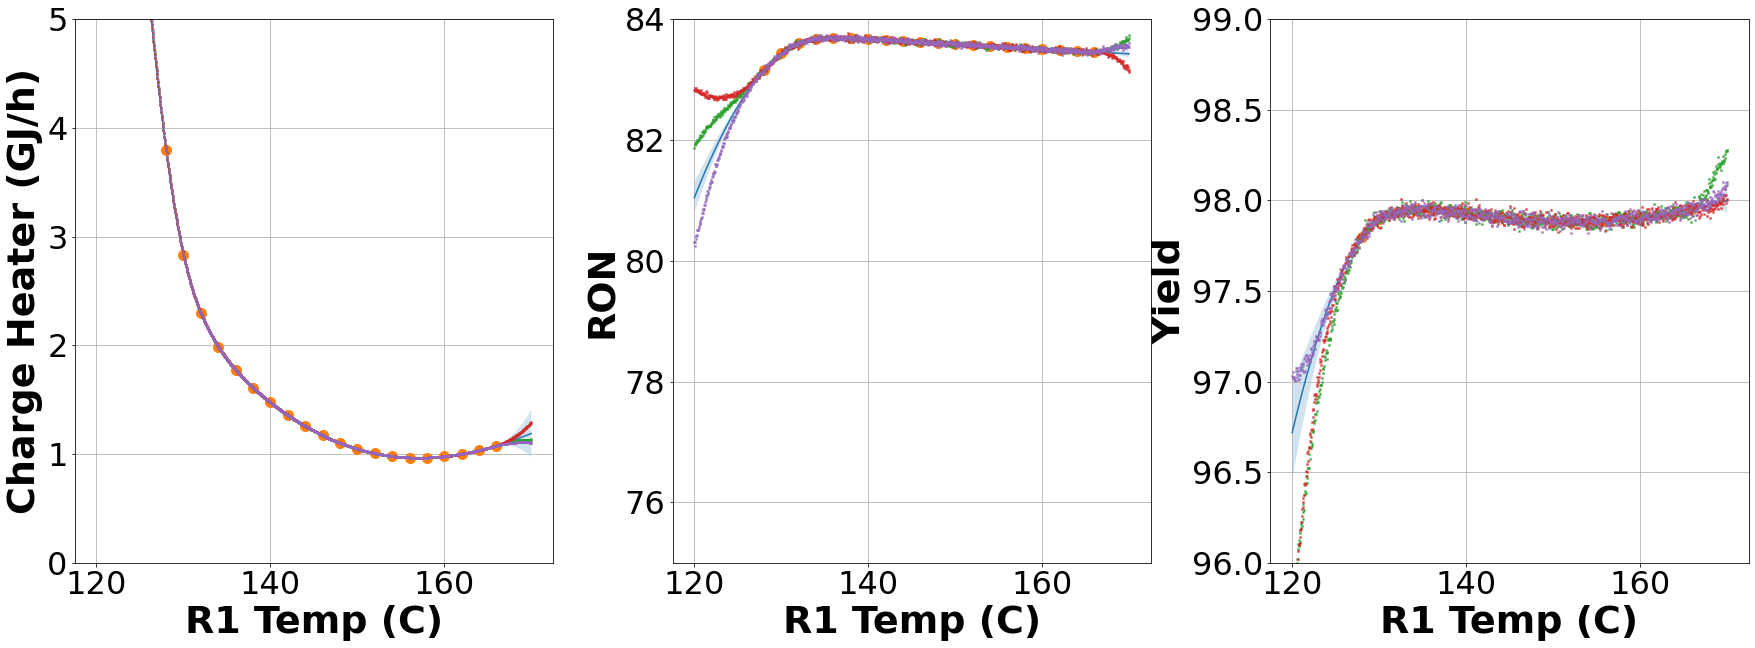

In [69]:

f, axes = plt.subplots(1, 3, figsize=(30, 10))

ax = axes[0]
ax.plot(r1temps, mu[:, 0] / 1e6, '-')
ax.fill_between(r1temps, a[:,0]/1e6, b[:,0]/1e6, alpha=0.2)
ax.plot(Xtrain[:, 0], Ytrain[:,0] / 1e6, 'o', markersize=10)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.set_xlabel('R1 Temp (C)', fontsize=38, fontweight='bold')
ax.set_ylabel('Charge Heater (GJ/h)', fontsize=38, fontweight='bold')
ax.grid(True)
ax.set_ylim([0, 5])
for s in range(samples.shape[2]):
    ax.plot(r1temps, samples[s, :, 0]/1e6, marker='x', linestyle='', markersize=2)

ax = axes[1]
ax.plot(r1temps, mu[:, 1], '-')
ax.fill_between(r1temps, a[:,1], b[:,1], alpha=0.2)
ax.plot(Xtrain[:, 0], Ytrain[:,1], 'o', markersize=10)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.set_xlabel('R1 Temp (C)', fontsize=38, fontweight='bold')
ax.set_ylabel('RON', fontsize=38, fontweight='bold')
ax.grid(True)
ax.set_ylim([75, 84])
for s in range(samples.shape[2]):
    ax.plot(r1temps, samples[s, :, 1], marker='x', linestyle='', markersize=2)


ax = axes[2]
ax.plot(r1temps, mu[:, 2], '-')
ax.fill_between(r1temps, a[:,2], b[:,2], alpha=0.2)
ax.plot(Xtrain[:, 0], Ytrain[:,2], 'o', markersize=10)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.set_xlabel('R1 Temp (C)', fontsize=38, fontweight='bold')
ax.set_ylabel('Yield', fontsize=38, fontweight='bold')
ax.grid(True)
ax.set_ylim([96, 99])
for s in range(samples.shape[2]):
    ax.plot(r1temps, samples[s, :, 2], marker='x', linestyle='', markersize=2)

plt.subplots_adjust(wspace=0.25)


In [26]:
samples[0,:,s]

array([12151442.22370522, 12078445.54879756, 12006939.35145918,
       11933043.18954876, 11861618.35920235, 11790757.61196057,
       11718854.64260299, 11646886.45217013, 11576212.4498382 ,
       11503505.03344405, 11433617.34875866, 11363125.62750573,
       11294024.1937309 , 11222201.13038853, 11152863.280509  ,
       11082757.09488138, 11013659.47798762, 10944616.85524963,
       10876707.80370468, 10807359.26098705, 10738588.29032881,
       10670443.81253242, 10602271.85214925, 10534547.75870622,
       10466962.78209359, 10398065.27038068, 10331669.17631658,
       10265217.25349299, 10198884.08973187, 10131430.04776347,
       10066604.37934953, 10000860.19530883,  9934838.41827747,
        9870692.34600902,  9804963.84251401,  9739992.78988116,
        9674949.5969579 ,  9610042.10854014,  9546710.85922967,
        9481894.21343789,  9419109.67084757,  9354848.62254951,
        9292464.03699403,  9229558.40866364,  9167736.43061169,
        9103999.54417029,  9042776.21302